# Numeriske biblioteker

## 1. Løse likninger

In [19]:
from scipy.optimize import root_scalar

def f(x):
    return x**2 - 4

def dfder(x):
    return 2*x

# Halveringsmetoden
nullpunkt_halvering = root_scalar(f,method="bisect",bracket=[0,5])
nullpunkt_newton = root_scalar(f,method="newton",fprime=dfder,x0=10)
print(nullpunkt_halvering)
print("-----------------------------------------")
print(nullpunkt_newton)

      converged: True
           flag: 'converged'
 function_calls: 44
     iterations: 42
           root: 1.9999999999993179
-----------------------------------------
      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 2.0


## 2. Derivere

In [20]:
from scipy.misc import derivative
import numpy as np

derivert = derivative(f, 1)
print(derivert)

2.0


## 3. Integrere

In [21]:
from scipy import integrate

x = np.linspace(0,2,1000)
y = f(x)

trapes = integrate.trapz(y,x)
print(trapes)

simpsons = integrate.simps(y,x)
print(simpsons)

-5.333331997329328
-5.333333331995993


## 4. Løse difflikninger

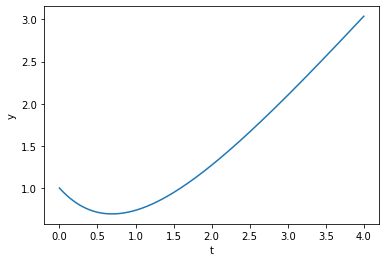

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dy_dt(t, y):
    return t - y

a = 0
b = 4
t = np.linspace(a,b,1000)
y0 = 1
y_int = solve_ivp(dy_dt, [a,b], [1], t_eval=t)

plt.xlabel("t")
plt.ylabel("y")
plt.plot(y_int.t, y_int.y[0])

plt.show()

## Multippel integrasjon* (for spesielt interesserte)

Vi løser følgende multiple integraler:
$$\int_0^{\frac{\pi}{2}} \int_{-1}^1  x \sin(y) - y e^x \ dx dy$$
$$\int_0^{3} \int_{0}^2  \int_{0}^1 xyz \ dx dy dz$$

In [23]:
from scipy import integrate
import numpy as np

def f(y,x):
    return x*np.sin(y) - y*np.exp(x)

def g(z, y, x):
    return x*y*z

numerisk_dobbel = integrate.dblquad(f, -1, 1, 0, np.pi/2)
numerisk_trippel = integrate.tplquad(g, 0, 1, 0, 2, 0, 3)

analytisk_dobbel = np.pi**2/8 * (1/np.exp(1)-np.exp(1))
analytisk_trippel = 9/2
print(f'Numerisk verdi av dobbeltintegralet: {numerisk_dobbel[0]}')
print(f'Analytisk verdi av dobbeltintegralet: {analytisk_dobbel}')

print(f'Numerisk verdi av trippelintegralet: {numerisk_trippel[0]}')
print(f'Analytisk verdi av trippelintegralet: {analytisk_trippel}')

Numerisk verdi av dobbeltintegralet: -2.899692718238082
Analytisk verdi av dobbeltintegralet: -2.8996927182380823
Numerisk verdi av trippelintegralet: 4.5
Analytisk verdi av trippelintegralet: 4.5
